# IRSALINA LAYALIA SHABRINA

# JABAR DIGITAL SERVICE - RECRUITMENT TASK (DATA NILAI PEGAWAI)

Data Nilai Pegawai diperoleh dari https://digitalservice.jabarprov.go.id/. Dataset ini berkaitan dengan performa kinerja Aparatur Sipil Negara dengan melakukan penilaian pada setiap pegawai. Nilai yang dihasilkan merupakan hasil kalkulasi pembobotan dari beberapa kriteria yang sudah ditentukan. Variabel pada Data Nilai Pegawai antara lain
1. ID Person : merupakan no identitas setiap pegawai
2. Tingkat Pendidikan Akhir : pendidikan akhir yang ditempuh oleh setiap pegawai
3. Usia : usia setiap pegawai saat ini
4. Satuan Kerja : satuan kerja dimana pegawai bekerja
5. Bulan : bulan ketika penilaian tiap pegawai dilakukan
6. Nilai : Nilai yang dihasilkan merupakan hasil kalkulasi pembobotan dari beberapa kriteria yang sudah ditentukan.

In [1]:
#IMPORT LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#IMPORT DATA
data=pd.read_excel('F://APPLY KERJA/APPLY/JABAR DIGITAL SERVICE/DATA ANALYST/Data Nilai Pegawai.xlsx')
data.head()

,ID PERSON,Tingkat Pendidikan Akhir,Usia,Satuan Kerja,Bulan,Nilai
0,1001,S3,61,DINAS B,Juli,7.88436
1,1002,SLTA,59,DINAS A,Juli,6.95183
2,1003,S2,57,BADAN D,Juli,8.18452
3,1004,SD,56,DINAS B,Juli,6.55612
4,1005,D3,54,DINAS B,Juli,6.34694


In [3]:
data.shape

(30, 6)

# Identifikasi Missing Values 

In [4]:
np.sum(data.isnull())

ID PERSON                   0
Tingkat Pendidikan Akhir    0
Usia                        0
Satuan Kerja                0
Bulan                       0
Nilai                       0
dtype: int64

Tidak terdapat observasi yang mengandung missing value

# Statistika Deskriptif

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
ID PERSON                   30 non-null int64
Tingkat Pendidikan Akhir    30 non-null object
Usia                        30 non-null int64
Satuan Kerja                30 non-null object
Bulan                       30 non-null object
Nilai                       30 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 1.5+ KB


Pada dataset digunakan tiga tipe data yaitu integer dan float yang termasuk ke dalam tipe data numerik dan object memiliki tipe data kategorik

In [6]:
data.describe()

,ID PERSON,Usia,Nilai
count,30.000000,30.000000,30.000000
mean,1015.500000,40.233333,7.185791
std,8.803408,10.753294,0.484566
min,1001.000000,25.000000,6.346940
25%,1008.250000,32.500000,6.964457
50%,1015.500000,41.000000,7.179420
75%,1022.750000,47.000000,7.452400
max,1030.000000,61.000000,8.403630


In [7]:
data.groupby(['Satuan Kerja']).size()

Satuan Kerja
BADAN B    5
BADAN D    5
DINAS A    5
DINAS B    5
DINAS F    5
DINAS P    5
dtype: int64

In [8]:
data_sat=data.select_dtypes(include=['object']).copy()

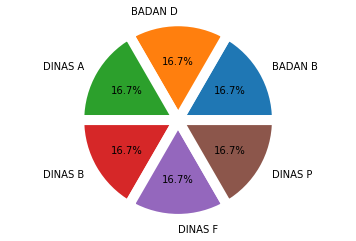

In [9]:
#Pie Chart pada satuan kerja
labels = data_sat['Satuan Kerja'].astype('category').cat.categories.tolist()
counts = data_sat['Satuan Kerja'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',wedgeprops = { 'linewidth' : 10, 'edgecolor' : 'white' }) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [10]:
data.groupby(['Tingkat Pendidikan Akhir']).size()

Tingkat Pendidikan Akhir
D3       5
D4       3
S1      14
S2       1
S3       1
SD       1
SLTA     4
SLTP     1
dtype: int64

In [11]:
data_pen=data.select_dtypes(include=['object']).copy()

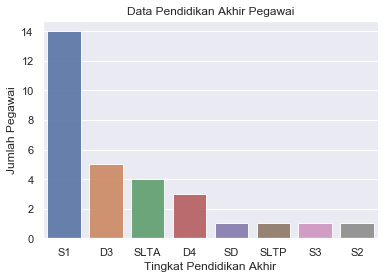

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
data_pen_count = data_pen['Tingkat Pendidikan Akhir'].value_counts()
sns.set(style="darkgrid")
sns.barplot(data_pen_count.index, data_pen_count.values, alpha=0.9)
plt.title('Data Pendidikan Akhir Pegawai')
plt.ylabel('Jumlah Pegawai', fontsize=12)
plt.xlabel('Tingkat Pendidikan Akhir', fontsize=12)
plt.show()

# Clustering

In [69]:
X=data.filter(items=['Usia','Nilai'])
X.head()

,Usia,Nilai
0,61,7.88436
1,59,6.95183
2,57,8.18452
3,56,6.55612
4,54,6.34694


In [70]:
X=X.values

In [16]:
conda install -c districtdatalabs yellowbrick

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\user\Anaconda3

  added / updated specs:
    - yellowbrick


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.11.27 |                0         163 KB
    certifi-2019.11.28         |           py37_0         157 KB
    conda-4.8.1                |           py37_0         3.0 MB
    ------------------------------------------------------------
                                           Total:         3.4 MB

The following packages will be UPDATED:

  ca-certificates                              2019.10.16-0 --> 2019.11.27-0
  certifi                                  2019.9.11-py37_0 --> 2019.11.28-py37_0
  conda                    conda-forge::conda-4.7.12-py37_0 --> pkgs/main::conda-4.8.1-py37_0




ca-certificates-2019 | 163 KB    |            |   0% 
ca-certificates-2019 | 

In [62]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [71]:
## Menggunakan metode elbow untuk menentukan angka cluster yang tepat
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False)

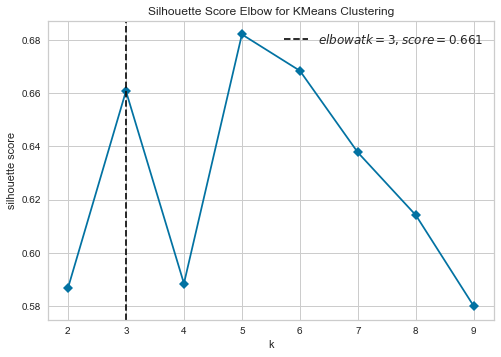

In [72]:
#fit data dan visualisasi
visualizer.fit(X)    
visualizer.poof()

Berdasarkan visualisasi, dapat dilihat bahwa bentuk elbow (siku) terlihat saat jumlah kluster adalah 3. Oleh karena itu, dapat tentukan bahwa jumlah K yang baik adalah 3.

In [73]:
# Menjalankan K-Means Clustering ke dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [74]:
#nilai centroid pada tiap cluster
print(kmeans.cluster_centers_)

[[42.6         7.10088193]
 [28.1         7.31367301]
 [57.4         7.18475388]]


In [75]:
print(kmeans.labels_)

[2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


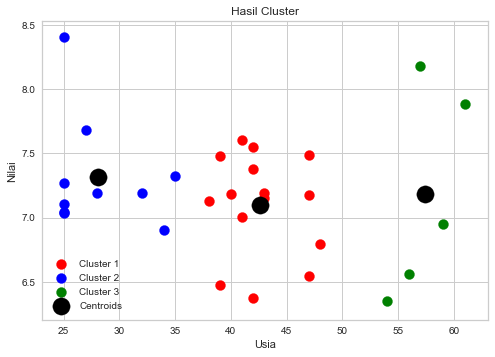

In [76]:
# Visualisasi hasil clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Hasil Cluster')
plt.xlabel('Usia')
plt.ylabel('Nilai')
plt.legend()
plt.show()

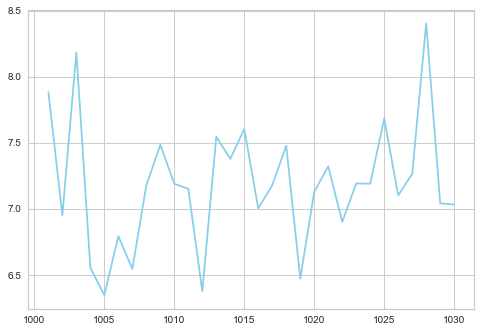

In [58]:
#Linechart 'Nilai' dan 'Id_peserta'
plt.plot( 'ID PERSON','Nilai', data=data, color='skyblue')
plt.show()